# Monte Carlo verification

In [1]:
import pileup

In [2]:
import math

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def piled_sample(l, f_sample, size=None):
    # Modified version of the function of the package to explain the pile-up process
    # Sample the number of particles being simultaneously detected per pulse (0,1,2,...)
    event_counts = np.random.poisson(l, size)
    # For efficiency, sample the total number of particles...
    all_samples = f_sample(sum(event_counts))
    # ... and generate lists with the particles in each detection
    cumulative = 0
    for i in event_counts:
        if i == 0:  # Exclude "detections" of no particles
            continue
        yield list(all_samples[cumulative:cumulative + i])
        cumulative += i


In [5]:
l = 1.0  # Pile-up parameter to simulate
distribution = np.random.uniform # Distribution to simulate: uniform in [0,1]
sample_size = 100000  # Number of pulses to simulate

In [6]:
# Monte Carlo sampling
particles=list(piled_sample(1.0,lambda x:distribution(size=x),sample_size))
num_particles = sum(map(len,particles))
num_detections = len(particles)
print("Total of particles reaching the detector: %d" % num_particles)
print("Total of detections: %d" % num_detections)
print("Ratio of particles/detections: %f" % (num_particles/num_detections))
# Expectation of a Poisson distribution conditioned by (counts > 0)
print("Theoretical ratio %f" % (l/(1-math.exp(-l))))

Total of particles reaching the detector: 99471
Total of detections: 62961
Ratio of particles/detections: 1.579883
Theoretical ratio 1.581977


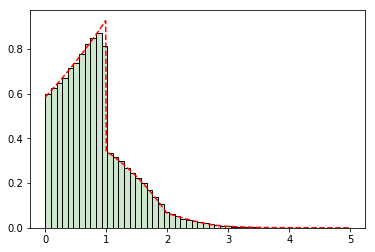

In [7]:
# Check the piled probability density function is reproduced

# In each detection, the sum of energies is seen by the detector
s = list(map(sum, particles))

# Plot a normalized histogram        
plt.hist(s, 50, density=True, facecolor='#CCE6CC', edgecolor='black')

# Model of the uniform distribution in [0,1]
bin_size = 0.01
x = np.arange(0, 5, bin_size)
y = np.array(list(map(lambda t: 1 if t < 1 else 0, x)))

piled = pileup.pile(y, l)
plt.plot(x, piled[:len(x)], "r--")
plt.show()


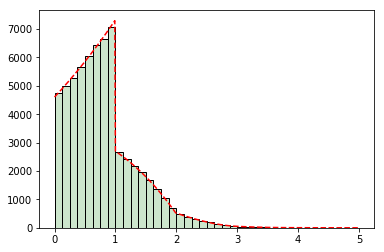

In [8]:
# Check the normalized distribution is also reproduced

num_bins=40
max_range = 5
plt.hist(s,num_bins,density=False,range=(0,max_range),facecolor='#CCE6CC', edgecolor='black');

# The histogram has (height=number of counts).
# The continuous function reproduces the area instead, so we have to multiply by the bin size of the histogram to
# reproduce its meaning.
plt.plot(x,num_detections * (max_range/num_bins) * piled[:len(x)],"r--")
plt.show()

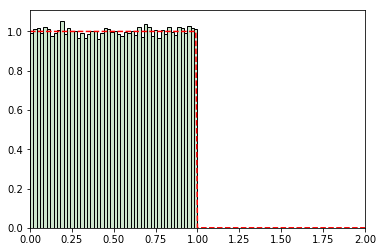

In [9]:
# Let's check depiling using normalized distributions


# Flatten the list
s2=[item for sublist in particles for item in sublist]

depiled=pileup.depile(piled,l)

# Plot a normalized histogram        
plt.hist(s2,50,density=True,facecolor='#CCE6CC', edgecolor='black')
# Note all bins are in [0,1] now, so they are thinner

plt.plot(x,depiled[:len(x)],"r--")
plt.xlim(0,2)
plt.show()

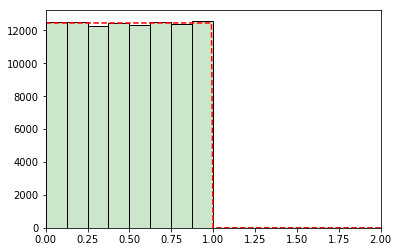

In [10]:
# Check the same with norms

# The height of the histogram depends on the size of the bins
num_bins=40
max_range = 5
plt.hist(s2,num_bins,density=False,range=(0,max_range),facecolor='#CCE6CC', edgecolor='black');

# Now we must include the additional factor of the ratio of detections and particles!!!
plt.plot(x,num_detections * (max_range/num_bins) * depiled[:len(x)] * l/(1-math.exp(-l)),"r--")
plt.xlim(0,2)
plt.show()